<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/sua_collapsibletube_try_(u).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sciann

     |████████████████████████████████| 174 kB 26.9 MB/s 
     |████████████████████████████████| 561 kB 60.1 MB/s 
     |████████████████████████████████| 460.3 MB 8.6 kB/s 
     |████████████████████████████████| 4.0 MB 67.0 MB/s 
     |████████████████████████████████| 132 kB 77.9 MB/s 
     |████████████████████████████████| 14.8 MB 55.3 MB/s 
     |████████████████████████████████| 1.2 MB 57.8 MB/s 
     |████████████████████████████████| 462 kB 59.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68708 sha256=407909cd964f5ca10395244a7eed87e393dd918ddbac4a5cd7837babd84c4e02
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existi

In [2]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [3]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t], 8*[20], 'tanh')
A = sn.Functional('A', [x,t],  8*[20], 'relu')

In [4]:
#L1 = diff(A, t) + u * diff(A, x) + A * diff(u, x)

In [5]:
rho = 1
#beta = 200
beta = 1
#L2 = diff(u, t) + u * diff(u, x) + beta / (2 * rho * sn.pow(A * A + 0.01, 0.25)) * diff(A, x, order=1)
L2 = diff(u, t) + u * diff(u, x)  

In [6]:
TOL = 0.001
T = 10
omega = 2 * np.pi / T
C1 = (1 - sign(t - TOL)) * (u - 0)
#C2 = (1 - sign(t - TOL)) * (A - 1)
#C3 = (1 - sign(x - TOL)) * (u - sin(omega * t))
C3 = (1 - sign(x - TOL)) * (u - sin(2*np.pi * t))
#C4 = (1 - sign(x - TOL)) * (A - 1)


In [7]:
#m = sn.SciModel([x,t], [L1,L2, C1, C3, C4], loss_func="mse", optimizer="Adam")
m = sn.SciModel([x,t], [L2, C1, C3], loss_func="mse", optimizer="Adam")

In [8]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100)
)

In [9]:
#h = m.train([x_data, t_data], 6*['zero'], learning_rate=0.001, epochs=1000, batch_size =120,  verbose=1, shuffle=True)
h = m.train([x_data, t_data], 3*['zero'], learning_rate=0.0007, epochs=3000,  verbose=1, shuffle=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
157/157 [==============================] - 1s 9ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0129 - add_loss: 5.6335e-04 - mul_2_loss: 6.5474e-04 - mul_4_loss: 0.0117 - lr: 7.0000e-04 - time: 1.3700
Epoch 504/3000
157/157 [==============================] - 1s 9ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0128 - add_loss: 7.5995e-04 - mul_2_loss: 7.6925e-04 - mul_4_loss: 0.0112 - lr: 7.0000e-04 - time: 1.3698
Epoch 505/3000
157/157 [==============================] - 1s 8ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0128 - add_loss: 8.6590e-04 - mul_2_loss: 9.2006e-04 - mul_4_loss: 0.0110 - lr: 7.0000e-04 - time: 1.3258
Epoch 506/3000
157/157 [==============================] - 1s 9ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0127 - add_loss: 7.8810e-04 - mul_2_loss: 8.1185e-04 - mul_4_loss: 0.0111 - lr: 7.0000e-04 - time: 1.3839
Epoch 507/3000
157/157 [==============================] - 1s 8ms/step - batch: 78.0000 - size: 63.6943 

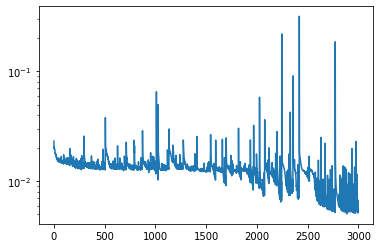

In [10]:
plt.semilogy(h.history['loss'])

In [11]:
h.history.keys()

dict_keys(['loss', 'add_loss', 'mul_2_loss', 'mul_4_loss', 'lr', 'time'])

<function matplotlib.pyplot.show>

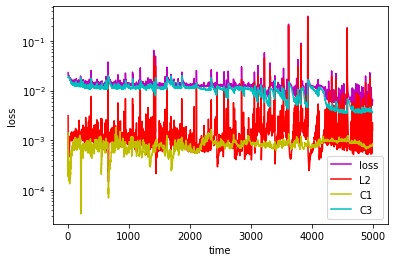

In [12]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_loss'],'r')
#plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_2_loss'],'y')
plt.semilogy(time, h.history['mul_4_loss'],'c')
#plt.semilogy(time, h.history['mul_10_loss'],'k')
#plt.semilogy(time, h.history['mul_11_loss'],'g')
plt.legend(['loss','L2','C1', 'C3'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show

In [13]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 0, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])




In [14]:
u_pred

array([[ 0.38913876,  0.37526065,  0.36494994,  0.3556317 ,  0.34681493,
         0.33818138,  0.32953304,  0.32068545,  0.31145695,  0.30173615,
         0.29154384,  0.28104734,  0.27050757,  0.26018047,  0.25022924,
         0.24069585,  0.23152108,  0.22256216,  0.21359035,  0.20432809,
         0.19458443,  0.18442425,  0.1741803 ,  0.16422583,  0.15471542,
         0.14555916,  0.13658254,  0.12766707,  0.11879256,  0.11001366,
         0.10141553,  0.0930732 ,  0.08502942,  0.07728688,  0.06980848,
         0.06251693,  0.05529833,  0.04801491,  0.04054145,  0.03282985,
         0.02498444,  0.01730344,  0.01023019,  0.00420876, -0.00047576,
        -0.00377529, -0.0058424 , -0.00693657, -0.0073356 , -0.00728203,
        -0.00696397, -0.00651525, -0.00602527, -0.00554921, -0.00511857,
        -0.00474913, -0.00444581, -0.00420748, -0.00402931, -0.00390463,
        -0.00382593, -0.00378591, -0.00377758, -0.00379474, -0.00383165,
        -0.00388362, -0.00394663, -0.0040172 , -0.0

In [16]:
u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,30)

In [17]:
u_pred

array([ 0.38913876,  0.37526065,  0.36494994,  0.3556317 ,  0.34681493,
        0.33818138,  0.32953304,  0.32068545,  0.31145695,  0.30173615,
        0.29154384,  0.28104734,  0.27050757,  0.26018047,  0.25022924,
        0.24069585,  0.23152108,  0.22256216,  0.21359035,  0.20432809,
        0.19458443,  0.18442425,  0.1741803 ,  0.16422583,  0.15471542,
        0.14555916,  0.13658254,  0.12766707,  0.11879256,  0.11001366,
        0.10141553,  0.0930732 ,  0.08502942,  0.07728688,  0.06980848,
        0.06251693,  0.05529833,  0.04801491,  0.04054145,  0.03282985,
        0.02498444,  0.01730344,  0.01023019,  0.00420876, -0.00047576,
       -0.00377529, -0.0058424 , -0.00693657, -0.0073356 , -0.00728203,
       -0.00696397, -0.00651525, -0.00602527, -0.00554921, -0.00511857,
       -0.00474913, -0.00444581, -0.00420748, -0.00402931, -0.00390463,
       -0.00382593, -0.00378591, -0.00377758, -0.00379474, -0.00383165,
       -0.00388362, -0.00394663, -0.0040172 , -0.00409267, -0.00

In [18]:
x_test

array([[0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

In [19]:
x_test = np.reshape(x_test, 100)
x_test

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Text(0, 0.5, 'u')

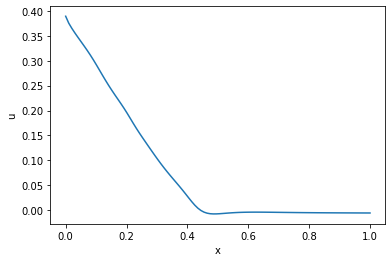

In [20]:
#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

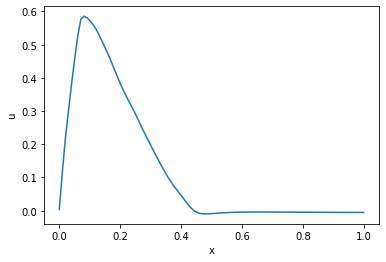

In [23]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0.5, 0.5, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,30)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

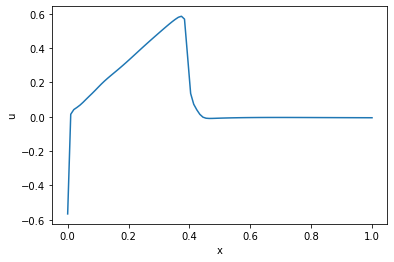

In [29]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(1, 1, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,100)
#A_pred = np.reshape(A_pred,30)
x_test = np.reshape(x_test, 100)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')